# IMPORT

## IMPORT LIBRARY

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer

#algoritma

from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, GaussianNB, CategoricalNB #algoritma yang digunakan
from sklearn import model_selection, svm

#plot
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

# Word2vec
import gensim
from wordcloud import WordCloud

# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import csv


#ras

import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from wordcloud import WordCloud

#kaggle

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import tensorflow as tf

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## IMPORT DATASET

In [ ]:
dataset_columns = ["label", "ids", "date", "flag", "user", "tweet"]

In [ ]:
#lokasi baca file
data = pd.read_csv('gdrive/My Drive/drive/dataset_sentiment.csv', encoding='latin-1', names=dataset_columns)
data_awal = pd.read_csv('gdrive/My Drive/drive/dataset_sentiment.csv', encoding='latin-1', names=dataset_columns)

In [ ]:
data.head()

,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data

,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
data = data.iloc[400000:1200000, :]

In [ ]:
data

,label,ids,date,flag,user,tweet
400000,0,2057298217,Sat Jun 06 12:44:31 PDT 2009,NO_QUERY,kannibalKoi,so mutha effin bored
400001,0,2057298537,Sat Jun 06 12:44:33 PDT 2009,NO_QUERY,TMankin,@CallaLilies83 not at all...I've spent most of...
400002,0,2057298663,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,theresa_jx,@GiGisOssum :/ My entire friggin family? Ther...
400003,0,2057298745,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,mishellfish,I absolutely &lt;3 sleeping in on saturdays. I...
400004,0,2057298766,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,meganleahhall,is a little upset at the moment
...,...,...,...,...,...,...
1199995,4,1985419277,Sun May 31 17:04:02 PDT 2009,NO_QUERY,yogunz,@misstinayao...im doin the same...so well defi...
1199996,4,1985419313,Sun May 31 17:04:01 PDT 2009,NO_QUERY,ERLong8502,Finding life's simple delights in the midst of...
1199997,4,1985419387,Sun May 31 17:04:02 PDT 2009,NO_QUERY,morgannee143,@McLovin143 just tell me when your on your wa...
1199998,4,1985419393,Sun May 31 17:04:02 PDT 2009,NO_QUERY,stephster,goodbye downtown


# CODE

In [ ]:
decode_map = {0: "negative", 4:"positive"}

def decode_sentiment(label):
    return decode_map[int(label)]

In [ ]:
data['label'] = data['label'].apply(lambda x: decode_sentiment(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,label,ids,date,flag,user,tweet
400000,negative,2057298217,Sat Jun 06 12:44:31 PDT 2009,NO_QUERY,kannibalKoi,so mutha effin bored
400001,negative,2057298537,Sat Jun 06 12:44:33 PDT 2009,NO_QUERY,TMankin,@CallaLilies83 not at all...I've spent most of...
400002,negative,2057298663,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,theresa_jx,@GiGisOssum :/ My entire friggin family? Ther...
400003,negative,2057298745,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,mishellfish,I absolutely &lt;3 sleeping in on saturdays. I...
400004,negative,2057298766,Sat Jun 06 12:44:34 PDT 2009,NO_QUERY,meganleahhall,is a little upset at the moment


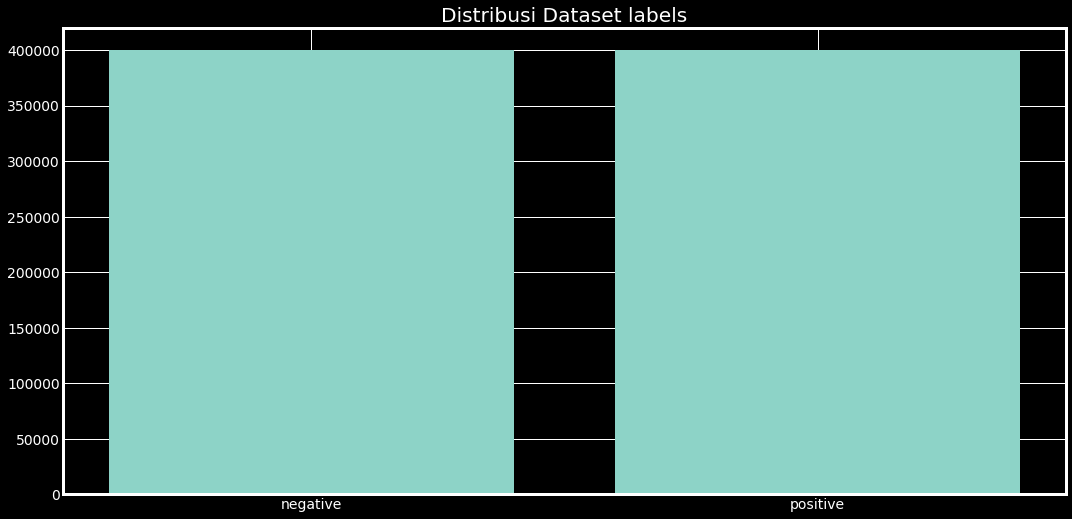

In [ ]:
target = Counter(data['label'])

plt.figure(figsize=(16,8))
plt.bar(target.keys(), target.values())
plt.title("Distribusi Dataset labels")

plt.show()

In [ ]:
data.isnull().sum()

label    0
ids      0
date     0
flag     0
user     0
tweet    0
dtype: int64

In [ ]:
unused_data = data[['ids', 'date', 'flag', 'user']]
data = data.drop(columns=unused_data)
data

,label,tweet
400000,negative,so mutha effin bored
400001,negative,@CallaLilies83 not at all...I've spent most of...
400002,negative,@GiGisOssum :/ My entire friggin family? Ther...
400003,negative,I absolutely &lt;3 sleeping in on saturdays. I...
400004,negative,is a little upset at the moment
...,...,...
1199995,positive,@misstinayao...im doin the same...so well defi...
1199996,positive,Finding life's simple delights in the midst of...
1199997,positive,@McLovin143 just tell me when your on your wa...
1199998,positive,goodbye downtown


In [ ]:
"""plt.figure(figsize = (20,20)) # Positive Sentiment
plt.grid(False)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.label == 'positive'].tweet))
plt.imshow(wc , interpolation = 'bilinear')"""

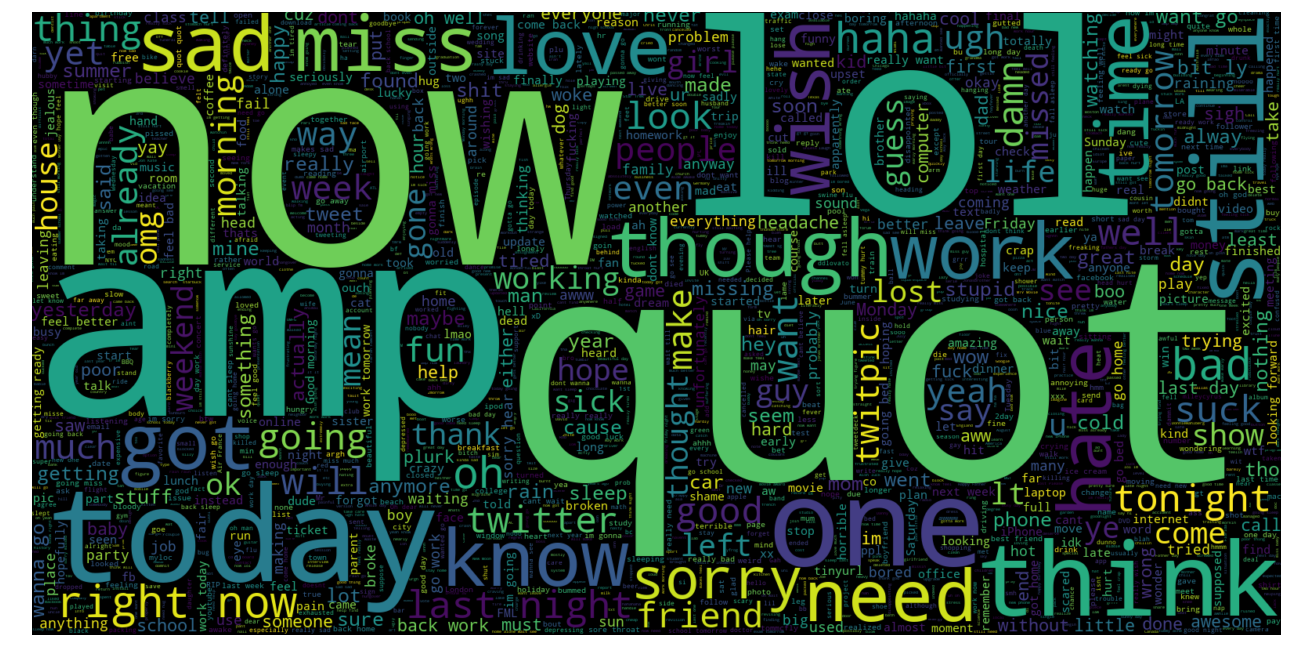

In [ ]:
"""plt.figure(figsize = (20,20)) # Positive Sentiment
plt.grid(False)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.label == 'negative'].tweet))
plt.imshow(wc , interpolation = 'bilinear')"""

## PROCESSING TEXT

In [ ]:
def preprocess_tweet(text):

    """ RUBAH MENJADI HURUF KECIL """
    text = text.lower()
    
    """ MENGHILANGKAN UNICODE """
    
    text = text.encode("ascii", "ignore")
    text = text.decode()
    
    """ MENGHILANGKAN URL """
    
    text = re.sub('(www\.[^\s]+)|(https?://[^\s]+)',' ',text)
    
    """ MENGHILANGKAN HASHTAG """
    text = re.sub(r'#([^\s]+)', ' ', text)
    
    """ MENGHILANGKAN ANGKA """
    text = ''.join([i for i in text if not i.isdigit()])
    
    """ MENGHILANGKAN USERNAME """
    text = re.sub('@[^\s]+',' ',text)  
    
    
    """ MENGHILANGKAN TANDA BACA LAINNYA"""
    text = text.translate(str.maketrans("  ","  ",string.punctuation))

    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
def clean_the_tweet(text):
    
  text = text.encode("ascii", "ignore")
  text = text.decode()
    
  """ MENGHILANGKAN URL """
    
  text = re.sub('(www\.[^\s]+)|(https?://[^\s]+)',' ',text)
    
  """ MENGHILANGKAN HASHTAG """
  text = re.sub(r'#([^\s]+)', ' ', text)
    
  """ MENGHILANGKAN ANGKA """
  text = ''.join([i for i in text if not i.isdigit()])
    
  """ MENGHILANGKAN USERNAME """
  text = re.sub('@[^\s]+',' ',text)  
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))

  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

In [ ]:
"""stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def tokenize_word(text, stem=False):

    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
                
    tokens = [token.lower() for token in tokens]
    return " ".join(tokens[2:])"""

In [ ]:
def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


In [ ]:
"""data['cleaned_tweet'] = data['tweet'].apply(preprocess_tweet)

data.head()
data['label'] = data['label'].apply(lambda x: 1 if x =='positive' else 0)
data.head()"""

In [ ]:
data['cleaned_tweet'] = data['tweet'].apply(clean_the_tweet)

In [ ]:
data['cleaned_tweet'].head()

400000                                          effin bored
400001    all i ve spent most of the afternoon in the ba...
400002    friggin family there s nothing to check though...
400003    lt sleeping in on saturdays i got ta find some...
400004                           little upset at the moment
Name: cleaned_tweet, dtype: object

In [ ]:
data['cleaned_tweet'] = data['cleaned_tweet'].apply(text_process)
data.reset_index(drop=True, inplace = True)
data.head()


,label,tweet,cleaned_tweet
0,negative,so mutha effin bored,effin bored
1,negative,@CallaLilies83 not at all...I've spent most of...,spent afternoon bathroom
2,negative,@GiGisOssum :/ My entire friggin family? Ther...,friggin family nothing check though gt lt asia...
3,negative,I absolutely &lt;3 sleeping in on saturdays. I...,lt sleeping saturdays got ta find something ke...
4,negative,is a little upset at the moment,little upset moment


In [ ]:
data['label'] = data['label'].apply(lambda x: 1 if x =='positive' else 0)

In [ ]:
data['label'].unique()

array([0, 1])

## Pembobotan Teks

In [ ]:
vectorizer_tfidf = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer_tfidf.fit_transform(data.cleaned_tweet)

vectorizer_count = CountVectorizer()
X_countvect = vectorizer_count.fit_transform(data.cleaned_tweet)


In [ ]:
#membagi data dimana pembobotannya menggunakan TFIDF
x_train_idf, x_test_idf, y_train_idf, y_test_idf = train_test_split(X_tf_idf, data['label'], random_state=42)

#membagi data dimana pembobotannya menggunakan Countvectorizer
x_train_countvect, x_test_countvect, y_train_countvect, y_test_countvect = train_test_split(X_countvect, data['label'], random_state=42)

## ALGORITMA

In [ ]:
def check_scores(clf, X_train, X_test, y_train, y_test):
      model = clf.fit(X_train, y_train)
      predicted_class = model.predict(X_test)
      predicted_class_train = model.predict(X_train)
      test_probs = model.predict_proba(X_test)
      test_probs = test_probs[:, 1]
      yhat = model.predict(X_test)
      lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
      lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


      print('Train confusion matrix is: ',)
      print(confusion_matrix(y_train, predicted_class_train))
      print()

      print('Test confusion matrix is: ')
      print(confusion_matrix(y_test, predicted_class))
      print()

      print(classification_report(y_test,predicted_class)) 
      print() 

      train_accuracy = accuracy_score(y_train,predicted_class_train)
      test_accuracy = accuracy_score(y_test,predicted_class)

      print("Train accuracy score: ", train_accuracy)
      print("Test accuracy score: ",test_accuracy )
      print()
      
      train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
      test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

      print("Train ROC-AUC score: ", train_auc)
      print("Test ROC-AUC score: ", test_auc)
      fig, (ax1, ax2) = plt.subplots(1, 2)

      ax1.plot(lr_recall, lr_precision)
      ax1.set(xlabel="Recall", ylabel="Precision")

      plt.subplots_adjust(left=0.5,
                        bottom=0.1, 
                        right=1.5, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
      print()
      print('Are under Precision-Recall curve:', lr_f1)
      
      fpr, tpr, _ = roc_curve(y_test, test_probs)


      ax2.plot(fpr, tpr)
      ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

      print("Area under ROC-AUC:", lr_auc)
      return train_accuracy, test_accuracy, train_auc, test_auc

In [ ]:
def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

### Artificial Neural Network

In [ ]:
corpus = [data['cleaned_tweet'][i] for i in range( len(data))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)

model=Sequential()
model.add(Dense(512, input_dim = max_sent_length, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(data['label'])
X_final.shape, y_final.shape

((800000, 159), (800000,))

In [ ]:
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_final, y_final, test_size=0.3, random_state=42)
model_ann = model.fit(X_train_NN, y_train_NN, validation_data = (X_test_NN, y_test_NN), epochs=10, batch_size=64)

Epoch 1/10
8750/8750 [==============================] - 26s 3ms/step - loss: 0.6968 - accuracy: 0.5121 - val_loss: 0.6951 - val_accuracy: 0.5125
Epoch 2/10
8750/8750 [==============================] - 25s 3ms/step - loss: 0.6949 - accuracy: 0.5131 - val_loss: 0.6932 - val_accuracy: 0.5223
Epoch 3/10
8750/8750 [==============================] - 21s 2ms/step - loss: 0.6946 - accuracy: 0.5138 - val_loss: 0.6947 - val_accuracy: 0.5203
Epoch 4/10
8750/8750 [==============================] - 22s 3ms/step - loss: 0.6948 - accuracy: 0.5121 - val_loss: 0.6925 - val_accuracy: 0.5154
Epoch 5/10
8750/8750 [==============================] - 21s 2ms/step - loss: 0.6944 - accuracy: 0.5132 - val_loss: 0.6922 - val_accuracy: 0.5137
Epoch 6/10
8750/8750 [==============================] - 22s 2ms/step - loss: 0.6943 - accuracy: 0.5140 - val_loss: 0.6981 - val_accuracy: 0.5123
Epoch 7/10
8750/8750 [==============================] - 22s 3ms/step - loss: 0.6941 - accuracy: 0.5124 - val_loss: 0.6935 - val_ac

In [ ]:
y_test_pred_NN=np.round(model.predict(X_test_NN))
y_train_pred_NN=np.round(model.predict(X_train_NN))
y_test_pred_NN

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
test_acc_NN = accuracy_score(y_test_NN, y_test_pred_NN)
train_acc_NN = accuracy_score(y_train_NN, y_train_pred_NN)
test_roc_NN = roc_auc_score(y_test_NN, y_test_pred_NN)
train_roc_NN = roc_auc_score(y_train_NN, y_train_pred_NN)

print("Acuuracy Test : " + str(test_acc_NN))
print("Acuuracy Train : " + str(train_acc_NN))
print("ROC Test : " + str(test_roc_NN))
print("ROC Test : " + str(train_roc_NN))

Acuuracy Test : 0.5209375
Acuuracy Train : 0.5207375
ROC Test : 0.5209308827186998
ROC Test : 0.5207403271813834


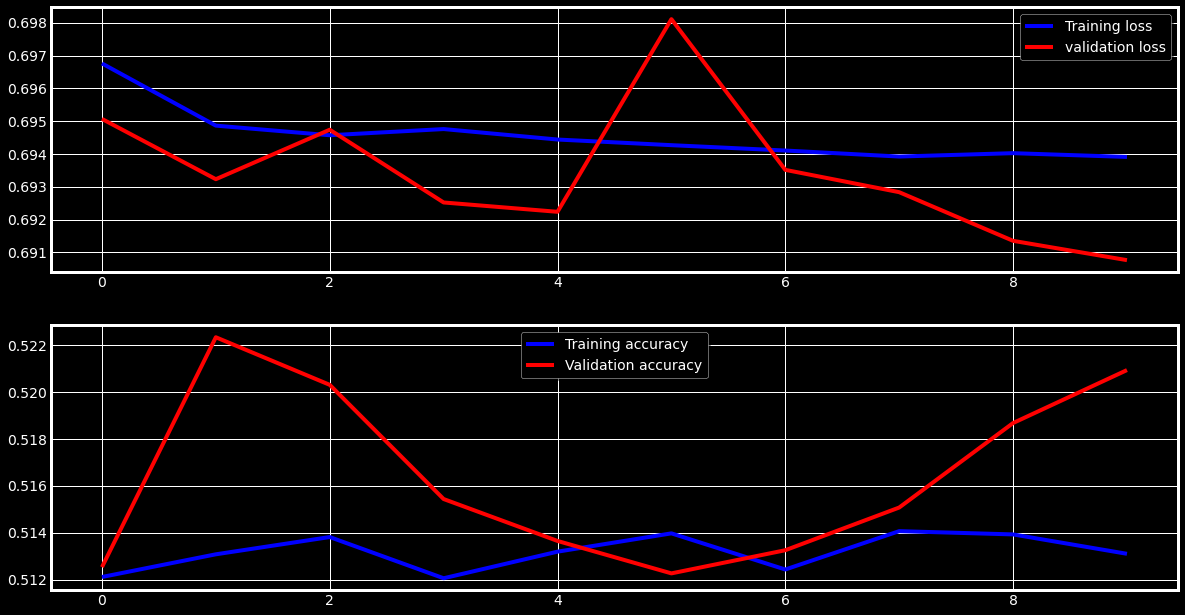

In [ ]:
# Plot kurva loss dan accuracy untuk training dan validation 

fig, ax = plt.subplots(2,1, figsize=(18, 10)) # Set Figure
ax[0].plot(model_ann.history['loss'], color='b', label="Training loss") #plot kurva untuk loss pada training
ax[0].plot(model_ann.history['val_loss'], color='r', label="validation loss",axes =ax[0]) #plot kurva untuk loss pada validasi
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_ann.history['accuracy'], color='b', label="Training accuracy") #plot kurva untuk akurasi pada training
ax[1].plot(model_ann.history['val_accuracy'], color='r',label="Validation accuracy") #plot kurva untuk akurasi pada validasi
legend = ax[1].legend(loc='best', shadow=True)

### LSTM

In [ ]:
corpus = [data['cleaned_tweet'][i] for i in range( len(data))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)
    
model=Sequential()
model.add(Embedding(voc_size,64,input_length=max_sent_length))
model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(data['label'])
X_final.shape,y_final.shape

((800000, 159), (800000,))

In [ ]:
X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X_final, y_final, test_size=0.3, random_state=42)
model_lstm = model.fit(X_train_LSTM, y_train_LSTM, validation_data = (X_test_LSTM, y_test_LSTM), epochs=20, batch_size=64)

Epoch 1/20
8750/8750 [==============================] - 2174s 248ms/step - loss: 0.5679 - accuracy: 0.7056 - val_loss: 0.5517 - val_accuracy: 0.7138
Epoch 2/20
8750/8750 [==============================] - 1909s 218ms/step - loss: 0.5496 - accuracy: 0.7199 - val_loss: 0.5440 - val_accuracy: 0.7194
Epoch 3/20
8750/8750 [==============================] - 1896s 217ms/step - loss: 0.5423 - accuracy: 0.7255 - val_loss: 0.5444 - val_accuracy: 0.7208
Epoch 4/20
8750/8750 [==============================] - 1902s 217ms/step - loss: 0.5357 - accuracy: 0.7304 - val_loss: 0.5457 - val_accuracy: 0.7201
Epoch 5/20
8750/8750 [==============================] - 1900s 217ms/step - loss: 0.5307 - accuracy: 0.7342 - val_loss: 0.5425 - val_accuracy: 0.7213
Epoch 6/20
8750/8750 [==============================] - 1904s 218ms/step - loss: 0.5262 - accuracy: 0.7378 - val_loss: 0.5459 - val_accuracy: 0.7213
Epoch 7/20
8750/8750 [==============================] - 1894s 216ms/step - loss: 0.5216 - accuracy: 0.7403

In [ ]:
y_test_pred_LSTM=np.round(model.predict(X_test_LSTM))
y_train_pred_LSTM=np.round(model.predict(X_train_LSTM))
y_test_pred_LSTM

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
test_acc_LSTM = accuracy_score(y_test_LSTM, y_test_pred_LSTM)
train_acc_LSTM = accuracy_score(y_train_LSTM, y_train_pred_LSTM)
test_roc_LSTM = roc_auc_score(y_test_LSTM, y_test_pred_LSTM)
train_roc_LSTM = roc_auc_score(y_train_LSTM, y_train_pred_LSTM)

print("Acuuracy Test : " + str(test_acc_LSTM))
print("Acuuracy Train : " + str(train_acc_LSTM))
print("ROC Test : " + str(test_roc_LSTM))
print("ROC Test : " + str(train_roc_LSTM))

Acuuracy Test : 0.7145541666666667
Acuuracy Train : 0.7910982142857143
ROC Test : 0.7145454098633817
ROC Test : 0.7911018944360316


### BiLSTM

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
corpus = [data['cleaned_tweet'][i] for i in range( len(data))]

vocsize=5000

onehot=[one_hot(words,vocsize)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot,padding='pre',maxlen=max_sent_length)


sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# Build model
model= Sequential()
model.add(Embedding(vocsize,64,input_length=max_sent_length))
model.add(Dropout(0.4))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, input_dim=(174), activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(data['label'])
X_final.shape,y_final.shape

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


((800000, 159), (800000,))

In [ ]:
# Train model
X_train_BiLSTM, X_test_BiLSTM, y_train_BiLSTM, y_test_BiLSTM = train_test_split(X_final, y_final, test_size=0.2, random_state=1)
X_train_BiLSTM, X_val_BiLSTM, y_train_BiLSTM, y_val_BiLSTM = train_test_split(X_train_BiLSTM, y_train_BiLSTM, test_size=0.25, random_state=1)
model_BiLSTM = model.fit(X_train_BiLSTM, y_train_BiLSTM, validation_data = (X_test_BiLSTM, y_test_BiLSTM), epochs=20, batch_size=64)

Epoch 1/20
7500/7500 [==============================] - 126s 15ms/step - loss: 0.5715 - accuracy: 0.7020 - val_loss: 0.5525 - val_accuracy: 0.7140
Epoch 2/20
7500/7500 [==============================] - 111s 15ms/step - loss: 0.5504 - accuracy: 0.7190 - val_loss: 0.5471 - val_accuracy: 0.7167
Epoch 3/20
7500/7500 [==============================] - 110s 15ms/step - loss: 0.5417 - accuracy: 0.7254 - val_loss: 0.5468 - val_accuracy: 0.7176
Epoch 4/20
7500/7500 [==============================] - 109s 15ms/step - loss: 0.5344 - accuracy: 0.7306 - val_loss: 0.5479 - val_accuracy: 0.7172
Epoch 5/20
7500/7500 [==============================] - 110s 15ms/step - loss: 0.5284 - accuracy: 0.7347 - val_loss: 0.5521 - val_accuracy: 0.7174
Epoch 6/20
7500/7500 [==============================] - 110s 15ms/step - loss: 0.5236 - accuracy: 0.7379 - val_loss: 0.5509 - val_accuracy: 0.7169
Epoch 7/20
7500/7500 [==============================] - 108s 14ms/step - loss: 0.5197 - accuracy: 0.7412 - val_loss: 0

### NAIVE BAYES

#### Multinomial Naive Bayes

In [ ]:
multinomial_nb = MultinomialNB(alpha=0.33)

##### Vectorizer menggunakan TFIDF

Train confusion matrix is: 
[[231126  68810]
 [ 60486 239578]]

Test confusion matrix is: 
[[72018 28046]
 [24740 75196]]

              precision    recall  f1-score   support

           0       0.74      0.72      0.73    100064
           1       0.73      0.75      0.74     99936

    accuracy                           0.74    200000
   macro avg       0.74      0.74      0.74    200000
weighted avg       0.74      0.74      0.74    200000


Train accuracy score:  0.7845066666666667
Test accuracy score:  0.73607

Train ROC-AUC score:  0.8650859065543541
Test ROC-AUC score:  0.8062203843278695

Are under Precision-Recall curve: 0.7401982498105111
Area under ROC-AUC: 0.7890237717061426


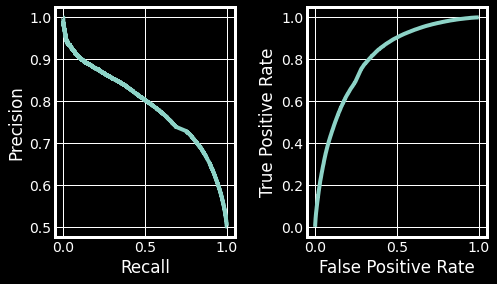

In [ ]:
m_train_accuracy_idf, m_test_accuracy_idf, m_train_auc_idf, m_test_auc_idf  = check_scores(multinomial_nb , x_train_idf, x_test_idf, y_train_idf, y_test_idf)


##### Vectorizer menggunakan Countvectorizer

Train confusion matrix is: 
[[231126  68810]
 [ 60486 239578]]

Test confusion matrix is: 
[[72018 28046]
 [24740 75196]]

              precision    recall  f1-score   support

           0       0.74      0.72      0.73    100064
           1       0.73      0.75      0.74     99936

    accuracy                           0.74    200000
   macro avg       0.74      0.74      0.74    200000
weighted avg       0.74      0.74      0.74    200000


Train accuracy score:  0.7845066666666667
Test accuracy score:  0.73607

Train ROC-AUC score:  0.8650859065543541
Test ROC-AUC score:  0.8062203843278695

Are under Precision-Recall curve: 0.7401982498105111
Area under ROC-AUC: 0.7890237717061426


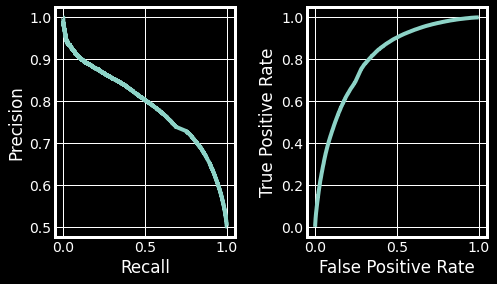

In [ ]:
m_train_accuracy_countvect, m_test_accuracy_countvect, m_train_auc_countvect, m_test_auc_countvect = check_scores(multinomial_nb , x_train_countvect, x_test_countvect, y_train_countvect, y_test_countvect)

#### Complement Naive Bayes

In [ ]:
complement_nb = ComplementNB(alpha=0.33)

##### Vectorizer menggunakan TFIDF

Train confusion matrix is: 
[[231126  68810]
 [ 60486 239578]]

Test confusion matrix is: 
[[72018 28046]
 [24740 75196]]

              precision    recall  f1-score   support

           0       0.74      0.72      0.73    100064
           1       0.73      0.75      0.74     99936

    accuracy                           0.74    200000
   macro avg       0.74      0.74      0.74    200000
weighted avg       0.74      0.74      0.74    200000


Train accuracy score:  0.7845066666666667
Test accuracy score:  0.73607

Train ROC-AUC score:  0.8650859065543541
Test ROC-AUC score:  0.8062203843278695

Are under Precision-Recall curve: 0.7401982498105111
Area under ROC-AUC: 0.7890237717061426


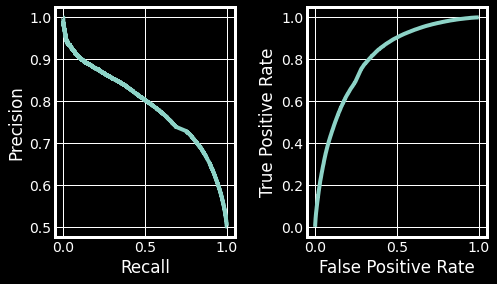

In [ ]:
cnb_train_accuracy_idf, cnb_test_accuracy_idf, cnb_train_auc_idf, cnb_test_auc_idf  = check_scores(multinomial_nb , x_train_countvect, x_test_countvect, y_train_countvect, y_test_countvect)

##### Vectorizer menggunakan Countvectorizer

Train confusion matrix is: 
[[231126  68810]
 [ 60486 239578]]

Test confusion matrix is: 
[[72018 28046]
 [24740 75196]]

              precision    recall  f1-score   support

           0       0.74      0.72      0.73    100064
           1       0.73      0.75      0.74     99936

    accuracy                           0.74    200000
   macro avg       0.74      0.74      0.74    200000
weighted avg       0.74      0.74      0.74    200000


Train accuracy score:  0.7845066666666667
Test accuracy score:  0.73607

Train ROC-AUC score:  0.8650859065543541
Test ROC-AUC score:  0.8062203843278695

Are under Precision-Recall curve: 0.7401982498105111
Area under ROC-AUC: 0.7890237717061426


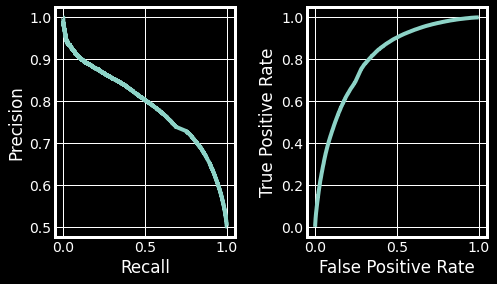

In [ ]:
cnb_train_accuracy_countvect, cnb_test_accuracy_countvect, cnb_train_auc_countvect, cnb_test_auc_countvect= check_scores(multinomial_nb , x_train_countvect, x_test_countvect, y_train_countvect, y_test_countvect)